In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import qiskit
qiskit.__version__

'0.16.4'

Potentially useful links

https://quantumcomputing.stackexchange.com/questions/9967/how-to-use-external-csv-data-file-in-quantum-support-vector-machine-qiskit-pyth

## Read Data

In [4]:
df = pd.read_csv('/Users/Brian/git/2021_Qiskitties/int_data/Merged_data.csv').iloc[:,1:]
df.head()

,Geographic Area_x,Median Income,City_State,poverty_rate,percent_completed_hs,share_white,share_black,share_native_american,share_asian,share_hispanic,...,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,AL,25615,Abbeville AL,29.1,69.1,54.4,41.4,0.1,1.0,3.1,...,gun,29.0,M,B,Abbeville,AL,False,attack,Not fleeing,False
1,AL,40292,Arab AL,16.7,87.6,96.6,0.1,0.6,0.7,1.7,...,gun,36.0,M,W,Arab,AL,False,attack,Car,False
2,AL,40547,Ashville AL,28.3,77.6,75.8,20.3,0.2,0.3,3.8,...,gun,41.0,M,W,Ashville,AL,False,attack,Not fleeing,False
3,AL,31576,Bay Minette AL,26.3,79.1,60.4,35.3,1.0,0.8,1.8,...,gun,54.0,M,W,Bay Minette,AL,False,attack,Not fleeing,False
4,AL,31061,Birmingham AL,30.9,85.1,22.3,73.4,0.2,1.0,3.6,...,gun,77.0,M,B,Birmingham,AL,True,attack,Not fleeing,False


In [5]:
df['flee'].value_counts()

Not fleeing    1699
Car             387
Foot            295
Other            96
Name: flee, dtype: int64

In [6]:
X = df.drop('flee', axis=1)
y = df['flee']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Geographic Area_x        2224 non-null   object 
 1   Median Income            2224 non-null   object 
 2   City_State               2542 non-null   object 
 3   poverty_rate             2224 non-null   float64
 4   percent_completed_hs     2224 non-null   float64
 5   share_white              2224 non-null   float64
 6   share_black              2224 non-null   float64
 7   share_native_american    2224 non-null   float64
 8   share_asian              2224 non-null   float64
 9   share_hispanic           2224 non-null   float64
 10  id                       2542 non-null   int64  
 11  name                     2542 non-null   object 
 12  date                     2542 non-null   object 
 13  manner_of_death          2542 non-null   object 
 14  armed                   

## Example: QSVM
https://qiskit.org/documentation/tutorials/machine_learning/01_qsvm_classification.html

In [8]:
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed

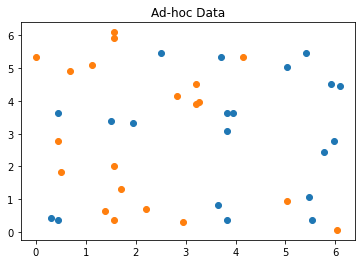

{'A': 0, 'B': 1}


In [9]:
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data

feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_label)

In [10]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

Testing success ratio: 1.0

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  success rate: 100.0%


## Example: QSVM multiple classes
https://qiskit.org/documentation/tutorials/machine_learning/02_qsvm_multiclass.html

In [11]:
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.multiclass_extensions import AllPairs
from qiskit.aqua.utils.dataset_helper import get_feature_dimension

In [24]:
def police(location, file, class_labels,training_size, test_size, n=2, PLOT_DATA=True):


    data, target, target_names = load_data(location, file)
    # sample_train is of the same form as data
    sample_train, sample_test, label_train, label_test = train_test_split(
        data, target,test_size=0.25, train_size=0.75 ,random_state=22)


    # Now we standarize for gaussian around 0 with unit variance
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)


    # Now reduce number of features to number of qubits
    pca = PCA(n_components=n).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)


    # Samples are pairs of points
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)


    # If class labels are numeric
    if class_labels[0].isdigit():
        # Pick training size number of samples from each distro
        training_input = {key: (sample_train[label_train == int(key), :])[:training_size] for k, key in enumerate(class_labels)}
        test_input = {key: (sample_test[label_test == int(key), :])[: test_size] for k, key in enumerate(class_labels)}

    else:
        # if they aren't
        training_input = {key: (sample_train[label_train == k, :])[:training_size] for k, key in
                         enumerate(class_labels)}
        test_input = {key: (sample_train[label_train == k, :])[training_size:(
                training_size + test_size)] for k, key in enumerate(class_labels)}



    if PLOT_DATA:
        for k in range(0, 9):
            plt.scatter(sample_train[label_train == k, 0][:training_size],
                        sample_train[label_train == k, 1][:training_size])

        plt.title("PCA dim. reduced user dataset")
        plt.show()

    return sample_train, training_input, test_input, class_labels

In [ ]:
n = 2
sample_Total, training_input, test_input, class_labels = wine(training_size=24,
                                                              test_size=6, n=n, plot_data=True)


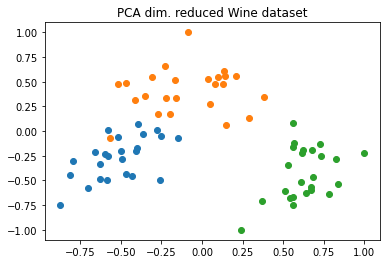

In [12]:
from qiskit.ml.datasets import wine

n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = wine(training_size=24,
                                                              test_size=6, n=n, plot_data=True)
temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)

In [23]:
training_input

{'A': array([[-0.36427445, -0.03398871, -0.11167034, -0.37058717],
        [-0.57554087,  0.01068342, -0.13490026, -0.16293913],
        [-0.65451349, -0.21402681, -0.0702214 , -0.22309725],
        [-0.25588589, -0.49875968, -0.07660565,  0.0641771 ],
        [-0.79816844, -0.31021957, -0.31150808, -0.11137848],
        [-0.39378628,  0.06358971,  0.1057448 , -0.18823123],
        [-0.39757643, -0.17714646, -0.31624169, -0.41881159],
        [-0.27544177,  0.00675905, -0.35556592, -0.29226366],
        [-0.24739318, -0.05297698, -0.08609811, -0.43131199],
        [-0.4942634 , -0.2049597 ,  0.20358416, -0.38989875],
        [-0.70347938, -0.58197407, -0.20354483, -0.30385919],
        [-0.43258439, -0.46207973,  0.07910591, -0.47500635]]),
 'B': array([[ 0.00166608,  0.29723301,  0.06711487,  0.24239895],
        [ 0.0538664 ,  0.27364838,  0.12488708,  0.0659451 ],
        [-0.15715061,  0.3381723 ,  0.15492316,  0.22919005],
        [-0.08914496,  1.        ,  0.20123894, -0.4258450

In [13]:
aqua_globals.random_seed = 10598

backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dimension=get_feature_dimension(training_input),
                           reps=2, entanglement='linear')
svm = QSVM(feature_map, training_input, test_input, total_array,
           multiclass_extension=AllPairs())
quantum_instance = QuantumInstance(backend, shots=1024,
                                   seed_simulator=aqua_globals.random_seed,
                                   seed_transpiler=aqua_globals.random_seed)

result = svm.run(quantum_instance)
for k,v in result.items():
    print(f'{k} : {v}')

testing_accuracy : 1.0
test_success_ratio : 1.0
predicted_labels : [0 1 2 2 2 2]
predicted_classes : ['A', 'B', 'C', 'C', 'C', 'C']


In [14]:
test_input

{'A': array([[-0.30877501, -0.19296975]]),
 'B': array([[0.00172978, 0.29184209]]),
 'C': array([[ 0.83361436, -0.3936271 ],
        [ 0.67724803, -0.3892359 ],
        [ 0.85338148, -0.28071525],
        [ 0.5064    , -0.13846685]])}

#### Test QSVM with shooting data

In [ ]:
def userDefinedData(location, file, class_labels,training_size, test_size, n=2, PLOT_DATA=True):


    data, target, target_names = load_data(location, file)
    # sample_train is of the same form as data
    sample_train, sample_test, label_train, label_test = train_test_split(
        data, target,test_size=0.25, train_size=0.75 ,random_state=22)


    # Now we standarize for gaussian around 0 with unit variance
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)


    # Now reduce number of features to number of qubits
    pca = PCA(n_components=n).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)


    # Samples are pairs of points
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)


    # If class labels are numeric
    if class_labels[0].isdigit():
        # Pick training size number of samples from each distro
        training_input = {key: (sample_train[label_train == int(key), :])[:training_size] for k, key in enumerate(class_labels)}
        test_input = {key: (sample_test[label_test == int(key), :])[: test_size] for k, key in enumerate(class_labels)}

    else:
        # if they aren't
        training_input = {key: (sample_train[label_train == k, :])[:training_size] for k, key in
                         enumerate(class_labels)}
        test_input = {key: (sample_train[label_train == k, :])[training_size:(
                training_size + test_size)] for k, key in enumerate(class_labels)}



    if PLOT_DATA:
        for k in range(0, 9):
            plt.scatter(sample_train[label_train == k, 0][:training_size],
                        sample_train[label_train == k, 1][:training_size])

        plt.title("PCA dim. reduced user dataset")
        plt.show()

    return sample_train, training_input, test_input, class_labels


In [15]:
feature_dim = np.shape(X)[1]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

training_input = X_train.copy()
test_input = X_test.copy()

## Example: VQC (Variational Quantum Classified) algorithm 
https://github.com/Qiskit/qiskit-aqua#machine-learning

In [16]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA
from qiskit.aqua.components.feature_maps import RawFeatureVector
from qiskit.ml.datasets import wine
from qiskit.circuit.library import TwoLocal

seed = 1376
aqua_globals.random_seed = seed

# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
_, training_input, test_input, _ = wine(training_size=12,
                                        test_size=4,
                                        n=feature_dim)

feature_map = RawFeatureVector(feature_dimension=feature_dim)
vqc = VQC(COBYLA(maxiter=100),
          feature_map,
          TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3),
          training_input,
          test_input)
result = vqc.run(QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                 shots=1024, seed_simulator=seed, seed_transpiler=seed))

print('Testing accuracy: {:0.2f}'.format(result['testing_accuracy']))

Testing accuracy: 1.00
